<a href="https://colab.research.google.com/github/linked0/deep-learning/blob/master/AAMY/Sentiment_Classification_Solutions_my.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Classification & How To "Frame Problems" for a Neural Network

### What You Should Already Know
* neural networks, forward and back-propagation
* stochastic gradient descent
* mean squared error
* and train/test spits

### Where to Get Help if You Need It
* Re-watch previous Udacity Lectures
* Levderage the recommended Course Reading Materail - Grokking Deep Learning
* Shoot me a tweet @iamtrask

### Tutorial Outline:
* Intro: The Importance of "Framing a Problem" (this lesson)
....


# 준비

In [1]:
!apt-get install -y -qq software-properties-common module-init-tools > /dev/null
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse > /dev/nul

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive


Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [2]:
###### git partially cloning
repo='deep-learning'
sub_dir='sentiment-network'
url='https://github.com/linked0/' + repo + '.git'
!mkdir $repo
%cd $repo
!git init
!git remote add -f origin $url
!git config core.sparsecheckout true
!echo $sub_dir >> .git/info/sparse-checkout
!git pull --recurse-submodules origin master
%cd $sub_dir
!ls

/content/deep-learning
Initialized empty Git repository in /content/deep-learning/.git/
Updating origin
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 1403 (delta 59), reused 19 (delta 11), pack-reused 1307
Receiving objects: 100% (1403/1403), 127.43 MiB | 27.66 MiB/s, done.
Resolving deltas: 100% (433/433), done.
From https://github.com/linked0/deep-learning
 * [new branch]      master     -> origin/master
From https://github.com/linked0/deep-learning
 * branch            master     -> FETCH_HEAD
/content/deep-learning/sentiment-network
labels.txt				     sentiment_network_2.png
requirements.txt			     sentiment_network.png
reviews.txt				     sentiment_network_pos.png
Sentiment_Classification_Projects.ipynb      sentiment_network_sparse_2.png
Sentiment_Classification_Solutions.ipynb     sentiment_network_sparse.png
Sentiment_Classification_Solutions_my.ipynb


In [0]:
from google.colab import files
files.download("reviews.txt")
 

# Lesson: Curate a Dataset

In [0]:
def pretty_print_review_and_label(i):
  print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt', 'r') # What we know!
reviews = list(map(lambda x:x[:-1], g.readlines()))
g.close()

g = open('labels.txt', 'r')
labels = list(map(lambda x:x[:-1].upper(), g.readlines()))
g.close()

In [4]:
len(reviews)

25000

In [5]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [6]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory


In [7]:
print('labels.txt \t : \t reviews.txt\n')
pretty_print_review_and_label(2137)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...


# Project 1: Quick Theory Validation
There are multiple ways to implement these projects, but in order to get your code closer to what Andrew shows in his solutions, we've provided some hhints and starter code thhroughout this notebook


In [0]:
from collections import Counter
import numpy as np

We'll create these `Counter` objects, one for words from positive reviews, one for words from negative reviews, and one for all the words

In [0]:
# Create these Counter objects to store positive, negative and total counts
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()


**TODO**: Examine all these reviews. For each word in positive review, increase the count for that word in both your positive counter and total words counter; likewise, for each word in a negative review, increase the count for that word in both your negative counter and the total words counter.
**Note**: Throughout these projects, you should use split(' ') to divide a piece of text(such as a review) into individual words. If you use split() instead, you'll get slightly different results than what the videos and solutions show.

In [0]:
# Loop over all the words in all the reviews and increment the counts in the appropriate counter objects
for i in range(len(reviews)):
  if(labels[i] == 'POSITIVE'):
    for word in reviews[i].split(' '):
      positive_counts[word] += 1
      total_counts[word] += 1
  else:
    for word in reviews[i].split(' '):
      negative_counts[word] += 1
      total_counts[word] += 1
      

Run the following two cells to list the words used in positive reviews and negative reviews, respectively, ordered from most to least commonly used..

In [11]:
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [12]:
# Examine the counts of the most common words in negative reviews
negative_counts.most_common()

[('', 561462),
 ('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625),
 ('t', 20361),
 ('film', 19218),
 ('you', 17549),
 ('on', 17192),
 ('not', 16354),
 ('have', 15144),
 ('are', 14623),
 ('be', 14541),
 ('he', 13856),
 ('one', 13134),
 ('they', 13011),
 ('at', 12279),
 ('his', 12147),
 ('all', 12036),
 ('so', 11463),
 ('like', 11238),
 ('there', 10775),
 ('just', 10619),
 ('by', 10549),
 ('or', 10272),
 ('an', 10266),
 ('who', 9969),
 ('from', 9731),
 ('if', 9518),
 ('about', 9061),
 ('out', 8979),
 ('what', 8422),
 ('some', 8306),
 ('no', 8143),
 ('her', 7947),
 ('even', 7687),
 ('can', 7653),
 ('has', 7604),
 ('good', 7423),
 ('bad', 7401),
 ('would', 7036),
 ('up', 6970),
 ('only', 6781),
 ('more', 6730),
 ('

As you can see, common words like "the" appear very often in both positive and negative reviews. Instead of finding the most common words in positive or negative reviews, what you really want are thhe words found in positive reviews more often than in negative reviews, and vice versa. To accomplish this, you'lll need to calcuate the ratios of word usage between positive and negative reviews

**TODO**: Check all the words you've seen and calculate the ratio of positive to negative uses and store that ratio in pos_neg_ratios

In [0]:
pos_neg_ratios = Counter()

# Calculate the ratios of positive and negative uses of the most common words
# Consider words to be "common" if they've been used at least 100 times
for term, cnt in list(total_counts.most_common()):
  if (cnt>100):
    pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
    pos_neg_ratios[term] = pos_neg_ratio

Examin the ratios you've calculated for a few words:


In [16]:
print('Pos-to-neg ratio for "the" = {}'.format(pos_neg_ratios['the']))
print('Pos-to-neg ratio for "amazing" = {}'.format(pos_neg_ratios['amazing']))
print("Pos-to-neg ratio for 'terrible' = {}".format(pos_neg_ratios['terrible']))

Pos-to-neg ratio for "the" = 1.0607993145235326
Pos-to-neg ratio for "amazing" = 4.022813688212928
Pos-to-neg ratio for 'terrible' = 0.17744252873563218


Looking closely at the values you just calculated, we see the following:
* Words that you would expect to see more often in positive reviews -- like 'amazong' --- have a ration greater than 1. The more skewed a word is toward positive, the farther from 1 its positive-to-negative ratio will be.
* Words that you would expect to see more often in negative reviews -- like "terrible" -- have positive values that are less than 1.. The more skewed a word is toward negative, the closer to zero its positive-to-negative ratio will be.
* Neutral words, which don't really convey any sentiment because you would expect to see them in all sorts of reviews -- like "the" -- have values very close to 1. A perfectly neutral word -- one that was used in exactly the same number of positive reviews as negative reviews -- would be almost exactly 1. The +1 we suggested you add to the denominator slightly biases words toward negative, but it won't matter because it will be a tiny bias and later we'll be ignoring words that are too close to neutral anywayl



In [0]:
# Convert ratios to logs
for word, ratio in pos_neg_ratios.most_common():
  pos_neg_ratios[word] = np.log(ratio)

In [18]:
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.07753744390572),
 ('felix', 3.152736022363656),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.80672172860924),
 ('victoria', 2.681021528714291),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.538973871058276),
 ('flawless', 2.451005098112319),
 ('superbly', 2.26002547857525),
 ('perfection', 2.159484249353372),
 ('astaire', 2.1400661634962708),
 ('captures', 2.038619547159581),
 ('voight', 2.030170492673053),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.978345424808467),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('soccer', 1.757857

In [19]:
list(reversed(pos_neg_ratios.most_common()))[:30]

[('boll', -4.969813299576001),
 ('uwe', -4.624972813284271),
 ('seagal', -3.644143560272545),
 ('unwatchable', -3.258096538021482),
 ('stinker', -3.2088254890146994),
 ('mst', -2.9502698994772336),
 ('incoherent', -2.9368917735310576),
 ('unfunny', -2.6922395950755678),
 ('waste', -2.6193845640165536),
 ('blah', -2.5704288232261625),
 ('horrid', -2.4849066497880004),
 ('pointless', -2.4553061800117097),
 ('atrocious', -2.4259083090260445),
 ('redeeming', -2.3682390632154826),
 ('prom', -2.3608540011180215),
 ('drivel', -2.3470368555648795),
 ('lousy', -2.307572634505085),
 ('worst', -2.286987896180378),
 ('laughable', -2.264363880173848),
 ('awful', -2.227194247027435),
 ('poorly', -2.2207550747464135),
 ('wasting', -2.204604684633842),
 ('remotely', -2.1972245773362196),
 ('existent', -2.0794415416798357),
 ('boredom', -1.995100393246085),
 ('miserably', -1.9924301646902063),
 ('sucks', -1.987068221548821),
 ('uninspired', -1.9832976811269336),
 ('lame', -1.981767458946166),
 ('insult

# Transforming Text into Numbers

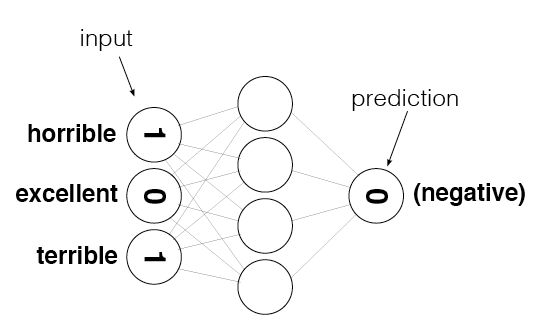

In [20]:
from IPython.display import Image
review = "This was a horrible, terrible movie."
Image(filename='sentiment_network.png')

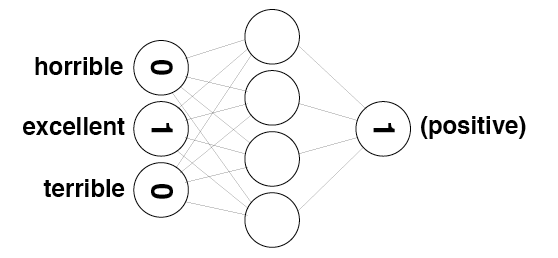

In [21]:
review = "The movie was exellent"
Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data
**TODO**: Create a [set](https://docs.python.org/3/tutorial/datastructures.html#sets) named `vocab` that contains every word in the vocabulary.

In [0]:
vocab = set(total_counts.keys())

In [24]:
 vocab_size = len(vocab)
 print(vocab_size)

74074


Take a look at thhe following image. it represents the layers of thhe neural netowkr you'll be building thhroughout this notebook. `layer_0` is the input layer, `layer_1` is a hidden layer, and `layer_2` is the output layer..

In [0]:
layer_0 = np.zeros((1, vocab_size))

In [26]:
layer_0.shape

(1, 74074)

`layer_0` contains one entry for every word in the vocabulary, as shown in the above image. We need to make sure we know the index of each word, so run the following cell to create a lookup table that stores the index of every word.

In [27]:
# Create a dictionary of words in the vocabulary mapped to index positions
# (to be used in layer_0)
word2index = {}
for i, word in enumerate(vocab):
  word2index[word] = i
  
# display the map of words to indices
word2index

{'': 0,
 'unexamined': 1,
 'syal': 2,
 'matamoros': 3,
 'beatin': 4,
 'underfoot': 5,
 'recaptures': 6,
 'buttocks': 7,
 'alterated': 8,
 'cringe': 9,
 'espinazo': 10,
 'clo': 11,
 'sagely': 12,
 'snatching': 13,
 'gritted': 14,
 'platonically': 15,
 'seared': 16,
 'bookended': 17,
 'bogey': 18,
 'organising': 19,
 'glumly': 20,
 'nasal': 21,
 'supermarionation': 22,
 'pierced': 23,
 'swears': 24,
 'hushed': 25,
 'richness': 26,
 'imom': 27,
 'meola': 28,
 'kareeena': 29,
 'goldust': 30,
 'fantasia': 31,
 'buyers': 32,
 'infested': 33,
 'inspiring': 34,
 'florida': 35,
 'coincidentially': 36,
 'howlin': 37,
 'postal': 38,
 'krantz': 39,
 'tiger': 40,
 'duplex': 41,
 'nails': 42,
 'reconstruct': 43,
 'antagonizing': 44,
 'monahan': 45,
 'morbidly': 46,
 'phoebe': 47,
 'calms': 48,
 'macca': 49,
 'thirteen': 50,
 'dvdbeaver': 51,
 'line': 52,
 'radiations': 53,
 'enlargement': 54,
 'watergate': 55,
 'concerns': 56,
 'shambolic': 57,
 'toyoko': 58,
 'baldness': 59,
 'centralised': 60,
 'b

**TODO**: Complete the implementation of `update_input_layer`. It should count how many times each word is used in the given review, and the store those counts at the appropirate indices inside `layer_0`

In [0]:
def update_input_layer(review):
  """ Modify the global layser_0 to represent the vector form of review.
  The element at a given index of layer_0 should represent 
  how may times the given word occurs in the review.
  Args:
    review(string) - the string of the review
  Returns:
    None
  """
  
  global layer_0
  
  # clear out previous state, reset the layer to be all 0s
  layer_0 *= 0
  
  # count how many times each word is used in the given review and store the result
  for word in review.split(' '):
    layer_0[0][word2index[word]] += 1

In [29]:
update_input_layer(reviews[0])
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

In [0]:
def get_target_for_label(label):
  if(label == 'POSITIVE'):
    return 1
  else:
    return 0

In [31]:
labels[0]


'POSITIVE'

In [32]:
get_target_for_label(labels[0])

1